In [2]:
import pandas as pd
import numpy as np
import os

df1 = pd.read_csv('googleplaystore.csv') 

data = df1[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Content Rating']].groupby(['App']).max().dropna().reset_index()
data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))
data["Reviews"] = pd.to_numeric(data["Reviews"])
mydata = data[['App',"Type",'Category', 'Content Rating', "Rating", "Reviews", "Installs"]]
mydata

C:\Users\andrz\AppData\Local\Temp/ipykernel_21048/2747569144.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Installs"] = pd.to_numeric(data["Installs"].str.replace(",","").str.replace("+",""))


,App,Type,Category,Content Rating,Rating,Reviews,Installs
0,+Download 4 Instagram Twitter,Free,SOCIAL,Everyone,4.5,40467,1000000
1,- Free Comics - Comic Apps,Free,COMICS,Mature 17+,3.5,115,10000
2,.R,Free,TOOLS,Everyone,4.5,259,10000
3,/u/app,Free,COMMUNICATION,Mature 17+,4.7,573,10000
4,058.ba,Free,NEWS_AND_MAGAZINES,Everyone,4.4,27,100
...,...,...,...,...,...,...,...
8191,감성학원 BL 첫사랑,Free,COMICS,Everyone,4.4,190,10000
8192,💎 I'm rich,Paid,LIFESTYLE,Everyone,3.8,718,10000
8193,"💘 WhatsLov: Smileys of love, stickers and GIF",Free,SOCIAL,Everyone,4.6,22098,1000000
8194,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Free,TOOLS,Everyone,4.0,19,10000


In [3]:
mydata['App'].duplicated().sum()

0

In [27]:
data_type.corr(method='pearson') #badanie korelacji

,Rating,Installs,Reviews
Rating,1.000000,0.040254,0.055035
Installs,0.040254,1.000000,0.623897
Reviews,0.055035,0.623897,1.000000


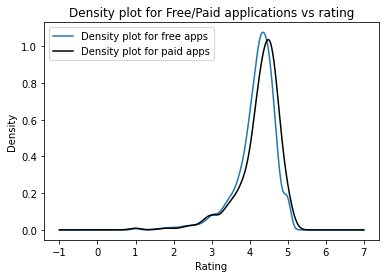

In [16]:
data_type = mydata[['App', 'Type', 'Rating', 'Installs', 'Reviews']]


free_type =data_type[data_type['Type']== 'Free']
paid_type =data_type[data_type['Type']== 'Paid']

import matplotlib.pyplot as plt


free_type['Rating'].plot.density()
paid_type['Rating'].plot.density(color = 'k')
plt.title('Density plot for Free/Paid applications vs rating')
plt.xlabel('Rating')
plt.legend(['Density plot for free apps', 'Density plot for paid apps'])

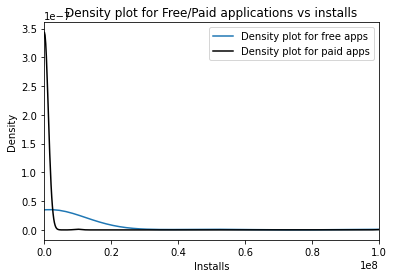

In [33]:
free_type =data_type[data_type['Type']== 'Free']
paid_type =data_type[data_type['Type']== 'Paid']

import matplotlib.pyplot as plt
import seaborn as sns


free_type['Installs'].plot.density(xlim=(0, free_type['Installs'].max()))
paid_type['Installs'].plot.density(xlim=(0, paid_type['Installs'].max()),color = 'k')
plt.title('Density plot for Free/Paid applications vs installs')
plt.xlabel('Installs')
plt.legend(['Density plot for free apps', 'Density plot for paid apps'])

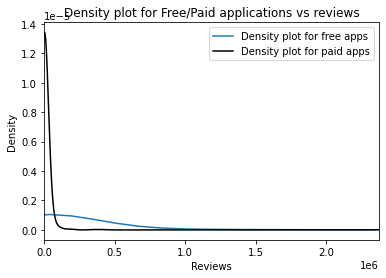

In [34]:
free_type["Reviews"].plot.density(xlim=(0, free_type['Reviews'].max()))
paid_type['Reviews'].plot.density(xlim=(0, paid_type['Reviews'].max()),color = 'k')
plt.title('Density plot for Free/Paid applications vs reviews')
plt.xlabel('Reviews')
plt.legend(['Density plot for free apps', 'Density plot for paid apps'])

<AxesSubplot:ylabel='Density'>

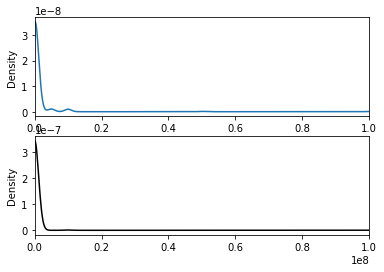

In [32]:
#przebieg dla 'Installs' bez usuwania outlines - na dwóch różnych wykresach

plt.subplot(2,1,1)
free_type['Installs'].plot.density(xlim=(0, free_type['Installs'].max()))
plt.subplot(2,1,2)
paid_type['Installs'].plot.density(xlim=(0, paid_type['Installs'].max()),color = 'k')

In [20]:
roz_mean_i =round(free_type['Installs'].mean() - paid_type['Installs'].mean(), 2)
roz_mean_i

9635767.33

In [21]:
roz_mean_r =round(free_type['Reviews'].mean() - paid_type['Reviews'].mean(), 2)
roz_mean_r

263766.95

In [22]:
stos_mean_i = round(free_type['Installs'].mean()/paid_type['Installs'].mean(), 2)
stos_mean_i

37.96

In [23]:
stos_mean_r = round(free_type['Reviews'].mean()/paid_type['Reviews'].mean(), 2)
stos_mean_r

25.16

In [24]:
avg_free = data_type[data_type['Type']== 'Free']['Rating'].mean()
avg_paid = data_type[data_type['Type']== 'Paid']['Rating'].mean()


print(f'Średnia ocena aplikacji darmowej to : {avg_free}, natomiast płatnej to: {avg_paid}')

Średnia ocena aplikacji darmowej to : 4.166504214963111, natomiast płatnej to: 4.26241721854304


In [25]:
avg_free_r = data_type[data_type['Type']== 'Free']['Reviews'].mean()
avg_paid_r = data_type[data_type['Type']== 'Paid']['Reviews'].mean()


print(f'Średnia liczba recenzji aplikacji darmowej to : {avg_free_r}, natomiast płatnej to: {avg_paid_r}')

Średnia liczba recenzji aplikacji darmowej to : 274686.51896733406, natomiast płatnej to: 10919.566225165563


In [26]:
avg_free_i = data_type[data_type['Type']== 'Free']['Installs'].mean()
avg_paid_i = data_type[data_type['Type']== 'Paid']['Installs'].mean()


print(f'Średnia liczba pobrań aplikacji darmowej to : {avg_free_i}, natomiast płatnej to: {avg_paid_i}')

Średnia liczba pobrań aplikacji darmowej to : 9896446.767123288, natomiast płatnej to: 260679.440397351


In [28]:
#statystyka - bez usuniecia outlines

s1 = data_type.groupby(by='Type').describe()['Rating']
s2 = data_type.groupby(by='Type').describe()['Reviews']
s3 = data_type.groupby(by='Type').describe()['Installs']

<AxesSubplot:>

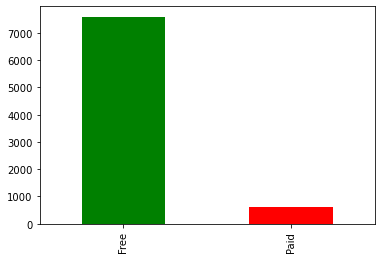

In [29]:
mydata['Type'].value_counts().plot(kind='bar', color=('green', 'red'))

In [5]:
free_type = mydata[mydata['Type']== 'Free']
free_type


,App,Type,Category,Content Rating,Rating,Reviews,Installs
0,+Download 4 Instagram Twitter,Free,SOCIAL,Everyone,4.5,40467,1000000
1,- Free Comics - Comic Apps,Free,COMICS,Mature 17+,3.5,115,10000
2,.R,Free,TOOLS,Everyone,4.5,259,10000
3,/u/app,Free,COMMUNICATION,Mature 17+,4.7,573,10000
4,058.ba,Free,NEWS_AND_MAGAZINES,Everyone,4.4,27,100
...,...,...,...,...,...,...,...
8190,英漢字典 EC Dictionary,Free,FAMILY,Everyone,4.3,55408,1000000
8191,감성학원 BL 첫사랑,Free,COMICS,Everyone,4.4,190,10000
8193,"💘 WhatsLov: Smileys of love, stickers and GIF",Free,SOCIAL,Everyone,4.6,22098,1000000
8194,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Free,TOOLS,Everyone,4.0,19,10000


In [6]:
rev_scores = free_type.sort_values(["Installs","Reviews"], ascending=False)
rev_scores = rev_scores.groupby(["Category"]).count().reset_index()
print("ilość aplikacji", rev_scores["App"].sum())
print("ilość kategorii", rev_scores["Category"].count())
rev_scores["Score"] = round(rev_scores["App"]/min(rev_scores["App"]))
cat_rank =rev_scores.iloc[:,[0,1,-1]].sort_values(["App"], ascending=False)
category_score =cat_rank[['Category', 'Score']]
cat_rank

ilość aplikacji 7592
ilość kategorii 33


,Category,App,Score
11,FAMILY,1492,36.0
14,GAME,835,20.0
29,TOOLS,656,16.0
12,FINANCE,289,7.0
18,LIFESTYLE,283,7.0
25,PRODUCTIVITY,283,7.0
4,BUSINESS,253,6.0
24,PHOTOGRAPHY,248,6.0
28,SPORTS,240,6.0
6,COMMUNICATION,235,6.0


In [7]:
rev_scores = free_type.sort_values(["Installs","Reviews"], ascending=False)
rev_scores_cont = rev_scores.groupby(["Content Rating"]).count().reset_index()
print("ilość aplikacji", rev_scores_cont["App"].sum())
print("ilość kategorii", rev_scores_cont["Content Rating"].count())
rev_scores_cont["Score"] = round(rev_scores_cont["App"]/min(rev_scores_cont["App"]))
cont_rank =rev_scores_cont.iloc[:,[0,1,-1]].sort_values(["App"], ascending=False)
content_score =cont_rank[['Content Rating', 'Score']]
content_score.rename(columns={'Score': 'Cont_score'}, inplace=True)
content_score

ilość aplikacji 7592
ilość kategorii 6


C:\Users\andrz\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Content Rating,Cont_score
1,Everyone,6105.0
4,Teen,867.0
3,Mature 17+,342.0
2,Everyone 10+,274.0
0,Adults only 18+,3.0
5,Unrated,1.0


In [8]:
file  = pd.merge(free_type, category_score, on='Category')
file

,App,Type,Category,Content Rating,Rating,Reviews,Installs,Score
0,+Download 4 Instagram Twitter,Free,SOCIAL,Everyone,4.5,40467,1000000,5.0
1,Alarm.fo – choose your info,Free,SOCIAL,Everyone,4.4,19,1000,5.0
2,All Social Networks,Free,SOCIAL,Everyone,4.2,22650,1000000,5.0
3,Amino: Communities and Chats,Free,SOCIAL,Teen,4.8,1264084,10000000,5.0
4,Anime et Manga Amino en Français,Free,SOCIAL,Teen,4.8,3782,50000,5.0
...,...,...,...,...,...,...,...,...
7587,T-Mobile® FamilyMode™,Free,PARENTING,Everyone,3.1,103,10000,1.0
7588,The first year of a baby's life,Free,PARENTING,Everyone,4.8,7505,100000,1.0
7589,Urban Limo Taxi Simulator,Free,PARENTING,Everyone,3.8,824,1000000,1.0
7590,Vegetable Fun,Free,PARENTING,Everyone,3.9,3182,1000000,1.0


In [9]:
file  = pd.merge(file, content_score, on='Content Rating')
file

,App,Type,Category,Content Rating,Rating,Reviews,Installs,Score,Cont_score
0,+Download 4 Instagram Twitter,Free,SOCIAL,Everyone,4.5,40467,1000000,5.0,6105.0
1,Alarm.fo – choose your info,Free,SOCIAL,Everyone,4.4,19,1000,5.0,6105.0
2,All Social Networks,Free,SOCIAL,Everyone,4.2,22650,1000000,5.0,6105.0
3,Au Pair,Free,SOCIAL,Everyone,3.6,58,10000,5.0,6105.0
4,BG LINKED (BGLINKED),Free,SOCIAL,Everyone,4.7,22,1000,5.0,6105.0
...,...,...,...,...,...,...,...,...,...
7587,Events High - Meet Your City!,Free,EVENTS,Everyone 10+,4.2,3200,100000,1.0,274.0
7588,Manga Books,Free,COMICS,Adults only 18+,3.8,7326,500000,1.0,3.0
7589,Manga Master - Best manga & comic reader,Free,COMICS,Adults only 18+,4.6,24005,500000,1.0,3.0
7590,DraftKings - Daily Fantasy Sports,Free,SPORTS,Adults only 18+,4.5,50017,1000000,6.0,3.0


In [10]:
d = free_type.sort_values(["Installs","Reviews"], ascending=False)
d = d.groupby(["Rating"]).count().reset_index()
d.iloc[:,:2].sort_values(["App"], ascending=False)

,Rating,App
31,4.3,848
32,4.4,826
33,4.5,782
30,4.2,754
34,4.6,607
29,4.1,591
28,4.0,491
35,4.7,392
27,3.9,343
26,3.8,267


In [11]:
file

,App,Type,Category,Content Rating,Rating,Reviews,Installs,Score,Cont_score
0,+Download 4 Instagram Twitter,Free,SOCIAL,Everyone,4.5,40467,1000000,5.0,6105.0
1,Alarm.fo – choose your info,Free,SOCIAL,Everyone,4.4,19,1000,5.0,6105.0
2,All Social Networks,Free,SOCIAL,Everyone,4.2,22650,1000000,5.0,6105.0
3,Au Pair,Free,SOCIAL,Everyone,3.6,58,10000,5.0,6105.0
4,BG LINKED (BGLINKED),Free,SOCIAL,Everyone,4.7,22,1000,5.0,6105.0
...,...,...,...,...,...,...,...,...,...
7587,Events High - Meet Your City!,Free,EVENTS,Everyone 10+,4.2,3200,100000,1.0,274.0
7588,Manga Books,Free,COMICS,Adults only 18+,3.8,7326,500000,1.0,3.0
7589,Manga Master - Best manga & comic reader,Free,COMICS,Adults only 18+,4.6,24005,500000,1.0,3.0
7590,DraftKings - Daily Fantasy Sports,Free,SPORTS,Adults only 18+,4.5,50017,1000000,6.0,3.0


In [ ]:
final_file['Total'] = total_frame
final_file.sort_values(['Total', 'Installs', 'Reviews'], ascending=False).iloc[:10]

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Category_Rank,Content_Rank,Sentiment_Polarity,Total
113,Angry Birds Classic,GAME,4.4,5566908,97M,100000000,Free,Everyone,93,175,273.0,541.0
134,Helix Jump,GAME,4.2,1500999,33M,100000000,Free,Everyone,93,175,273.0,541.0
100,Candy Crush Saga,GAME,4.4,22430188,74M,500000000,Free,Everyone,93,175,240.0,508.0
26,Bowmasters,GAME,4.7,1536349,Varies with device,50000000,Free,Teen,93,64,312.0,469.0
198,Duolingo: Learn Languages Free,FAMILY,4.7,6297590,Varies with device,100000000,Free,Everyone,31,175,240.0,446.0
111,Candy Crush Soda Saga,GAME,4.4,6199095,67M,100000000,Free,Everyone,93,175,166.0,434.0
245,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,4.6,1873523,Varies with device,50000000,Free,Everyone,2,175,255.0,432.0
123,Agar.io,GAME,4.2,3816799,32M,100000000,Free,Everyone,93,175,136.0,404.0
223,8 Ball Pool,SPORTS,4.5,14201891,52M,100000000,Free,Everyone,9,175,219.0,403.0
126,Cooking Fever,GAME,4.5,3198176,82M,100000000,Free,Everyone,93,175,135.0,403.0


In [ ]:
suma = file['Score'] + file['Cont_score'] 
total_2 = pd.Series(suma)
frame_2 = {'Total':total_2}
total_frame_2 = pd.DataFrame(frame_2)
total_frame_2

,Total
0,6110.0
1,6110.0
2,6110.0
3,6110.0
4,6110.0
...,...
7587,275.0
7588,4.0
7589,4.0
7590,9.0


In [ ]:
file['Total'] = total_frame_2
file.sort_values(['Total', 'Installs', 'Reviews'], ascending=False).iloc[:30]



,App,Type,Category,Content Rating,Rating,Reviews,Installs,Score,Cont_score,Total
2127,Hay Day,Free,FAMILY,Everyone,4.5,10053186,100000000,36.0,6105.0,6141.0
1965,Duolingo: Learn Languages Free,Free,FAMILY,Everyone,4.7,6297590,100000000,36.0,6105.0,6141.0
1712,Bubble Witch 2 Saga,Free,FAMILY,Everyone,4.3,2838064,100000000,36.0,6105.0,6141.0
2512,Talking Ginger,Free,FAMILY,Everyone,4.2,1752017,100000000,36.0,6105.0,6141.0
2510,Talking Ben the Dog,Free,FAMILY,Everyone,4.3,1633682,100000000,36.0,6105.0,6141.0
2590,Where's My Water? Free,Free,FAMILY,Everyone,4.4,1372013,100000000,36.0,6105.0,6141.0
2514,Talking Tom & Ben News,Free,FAMILY,Everyone,4.4,1131937,100000000,36.0,6105.0,6141.0
2541,Tom Loves Angela,Free,FAMILY,Everyone,4.1,1111915,100000000,36.0,6105.0,6141.0
2545,Township,Free,FAMILY,Everyone,4.6,4451317,50000000,36.0,6105.0,6141.0
2090,Frozen Free Fall,Free,FAMILY,Everyone,4.3,1574546,50000000,36.0,6105.0,6141.0


In [ ]:
d = file.sort_values(["Installs","Reviews"], ascending=False)
q = .8
pop = d[d["Total"] > d["Total"].quantile(q)]
# pop = pop[pop["Reviews"] > pop["Reviews"].quantile(q)]
pop.sort_values(["Installs","Reviews"], ascending=False).iloc[:10]

,App,Type,Category,Content Rating,Rating,Reviews,Installs,Score,Cont_score,Total
2127,Hay Day,Free,FAMILY,Everyone,4.5,10053186,100000000,36.0,6105.0,6141.0
1965,Duolingo: Learn Languages Free,Free,FAMILY,Everyone,4.7,6297590,100000000,36.0,6105.0,6141.0
1712,Bubble Witch 2 Saga,Free,FAMILY,Everyone,4.3,2838064,100000000,36.0,6105.0,6141.0
2512,Talking Ginger,Free,FAMILY,Everyone,4.2,1752017,100000000,36.0,6105.0,6141.0
2510,Talking Ben the Dog,Free,FAMILY,Everyone,4.3,1633682,100000000,36.0,6105.0,6141.0
2590,Where's My Water? Free,Free,FAMILY,Everyone,4.4,1372013,100000000,36.0,6105.0,6141.0
2514,Talking Tom & Ben News,Free,FAMILY,Everyone,4.4,1131937,100000000,36.0,6105.0,6141.0
2541,Tom Loves Angela,Free,FAMILY,Everyone,4.1,1111915,100000000,36.0,6105.0,6141.0
2545,Township,Free,FAMILY,Everyone,4.6,4451317,50000000,36.0,6105.0,6141.0
2090,Frozen Free Fall,Free,FAMILY,Everyone,4.3,1574546,50000000,36.0,6105.0,6141.0
